In [1]:
import duckdb
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from obsq.utils.core import convert_df_to_gdf
path = "/home/etienne/projects/obsq/work/dev/data/data.duckdb"


In [2]:
table = 'combined'
schema = 'score'
con = duckdb.connect(path)
df = con.execute(f"""SELECT* FROM {schema}.{table}""" ).df()
#df = df.drop(columns= 'geom')
con.close()

In [3]:
df.set_index('gbifID', inplace=True)

In [4]:
df.columns
cols = df.columns.to_list()
cols

['spatial_score',
 'pheno_score',
 'observer_score',
 'identifier_score',
 'expert_id_score']

In [5]:
df.describe()

,spatial_score,pheno_score,observer_score,identifier_score,expert_id_score
count,36323.000000,36323.000000,36323.000000,36323.000000,36323.000000
mean,0.000542,0.070528,0.379512,0.112368,0.087823
std,0.020023,0.087821,0.129833,0.162875,0.283041
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.293787,0.000000,0.000000
50%,0.000000,0.026715,0.392674,0.000000,0.000000
75%,0.000000,0.166667,0.458250,0.261268,0.000000
max,0.983656,0.627817,0.631391,0.532154,1.000000


In [6]:
df['sum'] = df[cols].sum(axis=1)
df.describe()

,spatial_score,pheno_score,observer_score,identifier_score,expert_id_score,sum
count,36323.000000,36323.000000,36323.000000,36323.000000,36323.000000,36323.000000
mean,0.000542,0.070528,0.379512,0.112368,0.087823,0.650773
std,0.020023,0.087821,0.129833,0.162875,0.283041,0.366044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.293787,0.000000,0.000000,0.377122
50%,0.000000,0.026715,0.392674,0.000000,0.000000,0.560897
75%,0.000000,0.166667,0.458250,0.261268,0.000000,0.852496
max,0.983656,0.627817,0.631391,0.532154,1.000000,2.141162


In [7]:
for c in cols:
    df[f'{c}_per'] = df[c] / df['sum']
df.describe()


,spatial_score,pheno_score,observer_score,identifier_score,expert_id_score,sum,spatial_score_per,pheno_score_per,observer_score_per,identifier_score_per,expert_id_score_per
count,36323.000000,36323.000000,36323.000000,36323.000000,36323.000000,36323.000000,35894.000000,35894.000000,35894.000000,35894.000000,35894.000000
mean,0.000542,0.070528,0.379512,0.112368,0.087823,0.650773,0.000843,0.109540,0.691125,0.134866,0.063627
std,0.020023,0.087821,0.129833,0.162875,0.283041,0.366044,0.025096,0.147246,0.257428,0.187687,0.206415
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.293787,0.000000,0.000000,0.377122,0.000000,0.000000,0.516527,0.000000,0.000000
50%,0.000000,0.026715,0.392674,0.000000,0.000000,0.560897,0.000000,0.043478,0.678795,0.000000,0.000000
75%,0.000000,0.166667,0.458250,0.261268,0.000000,0.852496,0.000000,0.184754,1.000000,0.313173,0.000000
max,0.983656,0.627817,0.631391,0.532154,1.000000,2.141162,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='sum', ylabel='Count'>

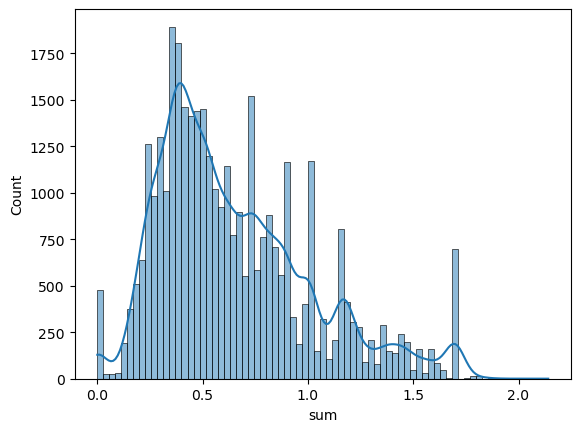

In [8]:
sns.histplot(df, x= 'sum', kde= True)